# Part I - (Loan Data from Prosper:)
## by (Alya)

## Introduction
> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others





## Preliminary Wrangling


In [62]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import zipfile
import requests 
import io

%matplotlib inline

<h2> Load  dataset 

In [63]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [65]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [66]:
df.sample(10)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
36516,52F13602887215496C575DA,1202610,2014-02-12 15:37:04.547000000,NaN,36,Current,NaN,0.14243,0.1139,0.1039,...,0.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,179
69361,EA59339699758120422B997,181925,2007-08-05 08:18:38.870000000,B,36,Completed,2010-08-15 00:00:00,0.16717,0.1600,0.1500,...,-199.63,0.00,0.0,0.0,0.0,1.0,0,0,0.0,289
68333,7E6B3595258224859C07443,1037547,2013-11-18 09:07:25.833000000,NaN,36,Current,NaN,0.19144,0.1550,0.1450,...,-10.96,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
85026,44253587948236018993B8D,886212,2013-09-03 11:32:13.013000000,NaN,60,Current,NaN,0.20593,0.1819,0.1719,...,-61.55,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
28593,B60F3541357671423EB6B3F,563376,2012-02-27 15:00:20.650000000,NaN,36,Completed,2013-04-30 00:00:00,0.33553,0.2958,0.2858,...,-40.93,-57.42,0.0,0.0,0.0,1.0,0,0,0.0,25
76857,77CC35194340712097F2EBA,514560,2011-07-04 21:53:54.297000000,NaN,36,Completed,2011-07-20 00:00:00,0.22362,0.1899,0.1799,...,-0.49,0.00,0.0,0.0,0.0,1.0,0,0,0.0,39
55857,9725359942005193537511D,1143008,2014-01-17 11:27:47.137000000,NaN,36,Current,NaN,0.15223,0.1239,0.1139,...,-6.79,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
51221,F6F035488640944012CE08E,594303,2012-05-30 11:13:44.340000000,NaN,60,Completed,2013-09-03 00:00:00,0.27462,0.2489,0.2389,...,-175.58,0.00,0.0,0.0,0.0,1.0,0,0,0.0,34
63071,C531354469955588234C498,578544,2012-04-13 15:20:48.303000000,NaN,36,Current,NaN,0.28851,0.2499,0.2399,...,-212.71,0.00,0.0,0.0,0.0,1.0,0,0,0.0,259
58875,C0F433749219107023762B5,68674,2006-11-30 15:04:27.387000000,AA,36,Completed,2007-08-22 00:00:00,0.09186,0.0850,0.0800,...,-19.75,0.00,0.0,0.0,0.0,1.0,0,0,0.0,170


In [67]:
df.LoanStatus.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [68]:
df.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [69]:
df.IncomeRange.value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [70]:
df.IncomeVerifiable.value_counts()

True     105268
False      8669
Name: IncomeVerifiable, dtype: int64

### What is the structure of your dataset?

> This data set contains 113,937 loans with 81 variables and the main importance variable is ListingKey,
ListingNumber ,ListingCreationDate ,Term and LoanStatus 
Most variables are numeric .

### What is/are the main feature(s) of interest in your dataset?

>It will be interesting for me know what features are the best for predicting default on credit and loan status based on this dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Predicting LoanStatus is most likely to be affected by EmploymentStatus and Income Verifiable.

## Univariate Exploration

 


<h3>Loan status

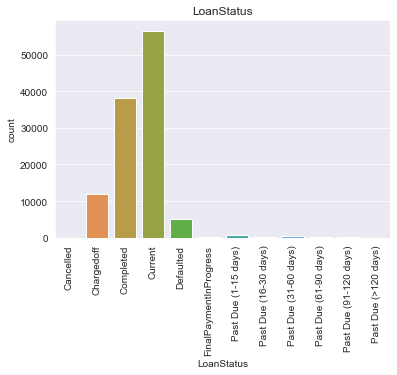

In [71]:
df = df.sort_values(by='LoanStatus')
plt.xticks(rotation=90)
sb.countplot(data = df, x = 'LoanStatus' )
plt.title('LoanStatus');


Observation 1:
<ul>
    <li>The highest loan state is uncompleted </li>
    

<h3>Employment Status

Text(0.5, 1.0, 'EmploymentStatus')

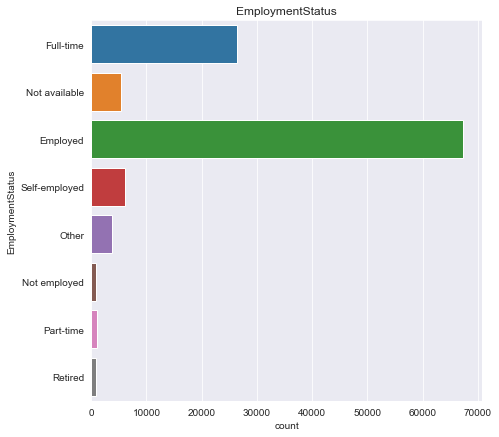

In [72]:
plt.figure(figsize=(7, 7))
sb.countplot(y='EmploymentStatus', data=df)
plt.title('EmploymentStatus')


Observation 2:<br>
as Show in Figure the majority of how take a loan is Employed .

<h3>Income Range

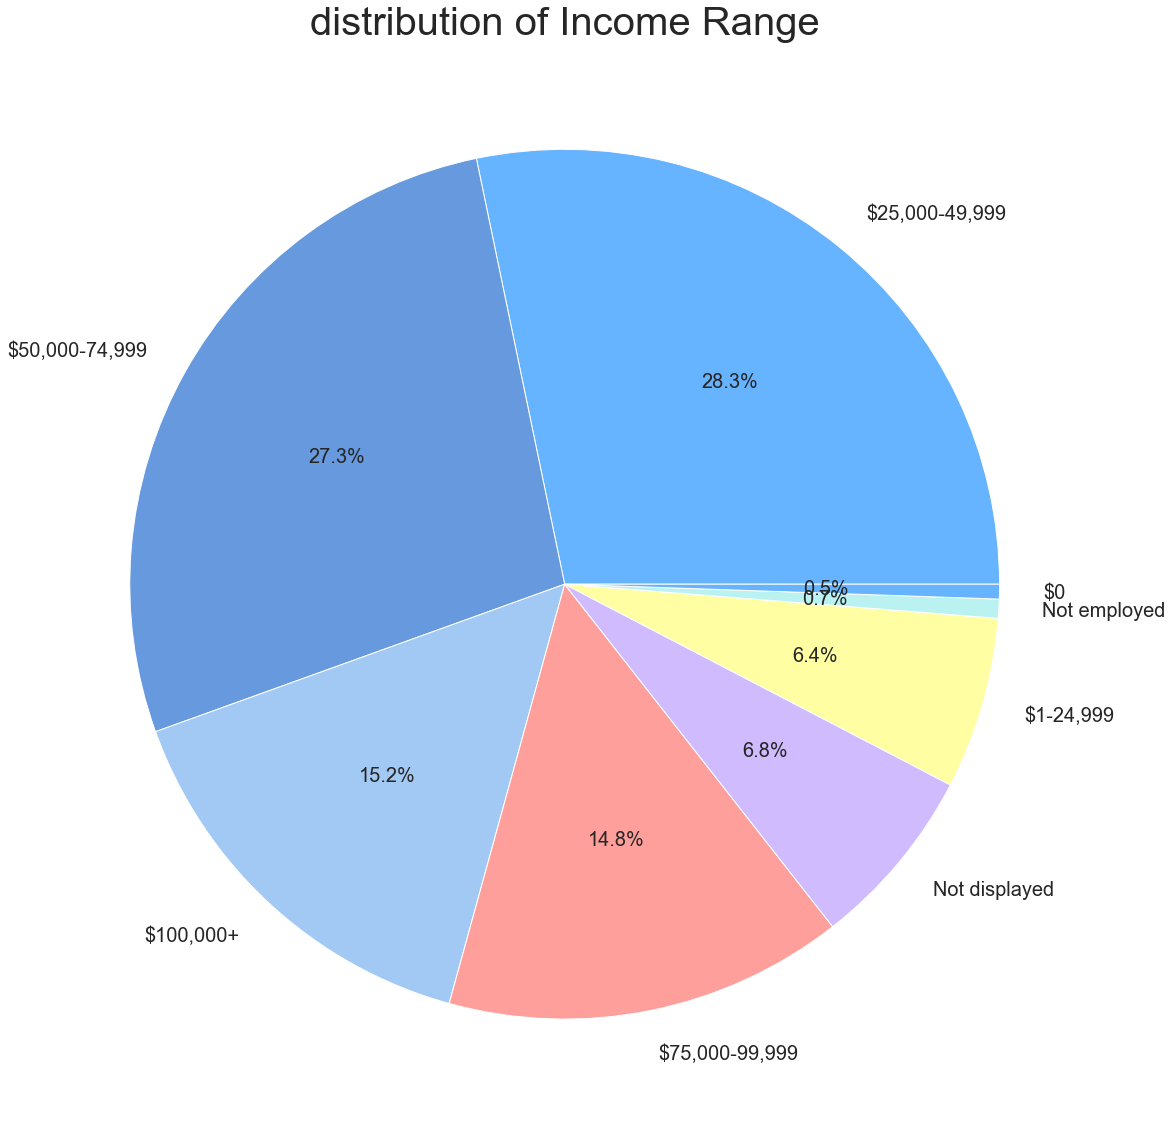

In [73]:
Income_Range=df.IncomeRange.value_counts()
#creating a list of colors to use
colors = ['#66b3ff','#69d','#a1c9f4', '#ff9f9b', '#d0bbff', '#fffea3', '#b9f2f0']
#setting the plot axes and plotting the data
fig, axes = plt.subplots(figsize=(20, 20));
Income_Range.plot(kind='pie' , autopct='%1.1f%%' , colors=colors,fontsize = 20);
#setting the plot's title
plt.title('distribution of Income Range' , fontsize = 40);
plt.ylabel('');


Observation 3:<br>
as Show in Figure the majority of Income Rangr is $25,000-49,999 The percentage of their is 27.3%. 

<h3>IsBorrowerHomeowner

Text(0.5, 1.0, 'IsBorrowerHomeowner')

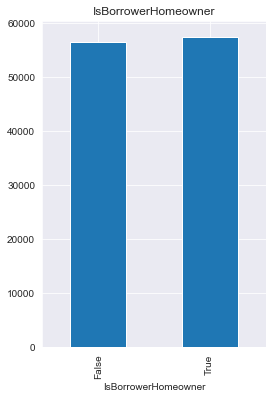

In [74]:
plt.figure(figsize=(4, 6))
df.groupby("IsBorrowerHomeowner").size().plot(kind='bar')
plt.title('IsBorrowerHomeowner')


observation 4: <br>
Most of who people granted loans are not home owner


<h3>CurrentlyInGroup

Text(0.5, 1.0, 'CurrentlyInGroup')

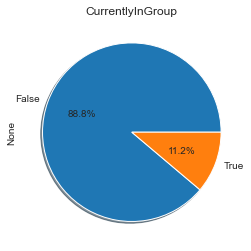

In [75]:
plt.figure(figsize=(4, 6))
df.groupby("CurrentlyInGroup").size().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('CurrentlyInGroup')


observation 5: <br>
Most of who people granted loans are not belong in any group.


<h3>LP_CustomerPrincipalPayments

Text(0.5, 1.0, 'distribution of LP_CustomerPrincipalPayments')

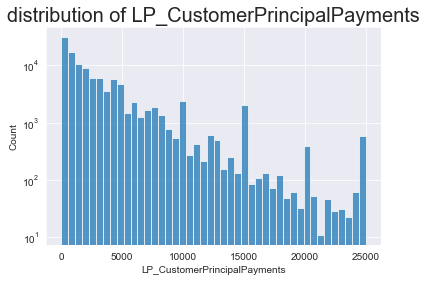

In [76]:
bins = np.linspace(0, 25000, 45)
sb.histplot(data=df, x='LP_CustomerPrincipalPayments', bins=bins)
plt.yscale('log')
plt.title('distribution of LP_CustomerPrincipalPayments',fontsize = 20)


observation 6:<br>
Whenever the amount increases, the number of payments before charging off decreases with spikes every 5000 payments.

<h3>CreditScoreRang

Text(0.5, 1.0, 'CreditScoreRangeLower')

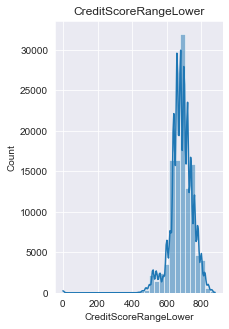

In [77]:
fig, ax=plt.subplots(nrows=1, figsize=(3, 5))
color=sb.color_palette()[3]
sb.histplot(x='CreditScoreRangeLower', data=df, ax=ax, bins=30, kde=True )
plt.title('CreditScoreRangeLower')




Text(0.5, 1.0, 'CreditScoreRangeUpper')

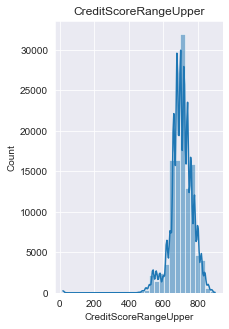

In [78]:
fig, ax=plt.subplots(nrows=1, figsize=(3, 5))
color=sb.color_palette()[3]
sb.histplot(x='CreditScoreRangeUpper', data=df, ax=ax, bins=30, kde=True)
plt.title('CreditScoreRangeUpper')


Text(0.5, 1.0, 'CreditScoreRangeLower')

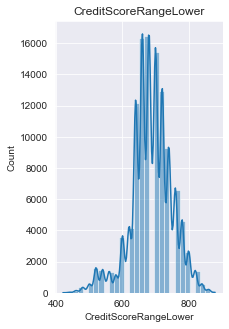

In [79]:

fig, ax=plt.subplots(nrows=1, figsize=(3, 5))
sb.histplot(x='CreditScoreRangeLower', data=df[df.CreditScoreRangeLower>=400], ax=ax, bins=30, kde=True)
plt.title('CreditScoreRangeLower')


Text(0.5, 1.0, 'CreditScoreRangeUpper')

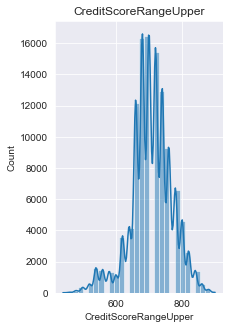

In [80]:
fig, ax=plt.subplots(nrows=1, figsize=(3, 5))
sb.histplot(x='CreditScoreRangeUpper', data=df[df.CreditScoreRangeUpper>=400], ax=ax, bins=30, kde=True)
plt.title('CreditScoreRangeUpper')

Text(0.5, 1.0, 'CreditScoreAverage')

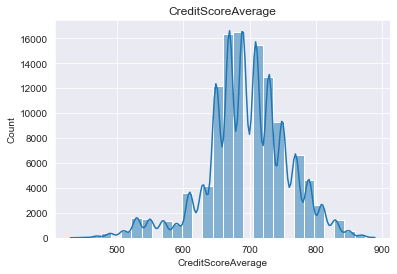

In [81]:
df['CreditScoreAverage'] = (df.CreditScoreRangeLower + df.CreditScoreRangeUpper)/2
sb.histplot(x='CreditScoreAverage', data=df[df.CreditScoreAverage>=400], bins=30, kde=True)
plt.title('CreditScoreAverage')


Observation 7:<br>
There are only a few values below 400 and above where most of the data is concentrated. The credit score range appears left skewed. Based on the distribution for those values greater than 400 only, both the upper and lower credit limits appear to follow a normal distribution.

It is easier to work with the average of values for both the upper and credit score ranges, since they have similar distributions of values.


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>the variables it doesn’t tend to be unsual .the transformations Apply was for select most Interesting and usefull variables.
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> the most of distributions was noraml ,but thire was  a few outlier  showed in the lower and upper limit of the credit score range.so I combined them to be single columns 

## Bivariate Exploration.

<h3>LoanStatus and LoanOriginalAmount

In [82]:
def boxgrid(x, y, title = None,  **kwargs):
    sb.set_style('darkgrid')
    ax = sb.boxplot(x=x, y=y, color='b', width = 0.2)
    plt.title(title, weight = 'bold', fontsize = 15)
   


 

In [83]:
 df = df[df["LoanStatus"].isin(["Completed", "Defaulted", "Chargedoff"])]
df["LoanStatus"] = df["LoanStatus"].replace("Chargedoff", "Defaulted")
df["LoanStatus"].value_counts()


Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

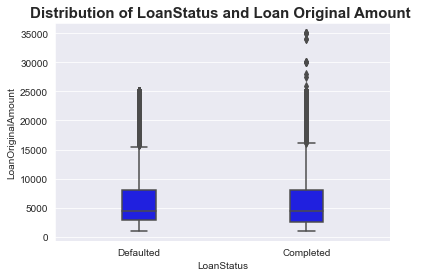

In [84]:
x=df.LoanStatus
y=df.LoanOriginalAmount
boxgrid(x,y,"Distribution of LoanStatus and Loan Original Amount ",)

Observation 1:<br>
we can see from the Above Graph that defaulted credits tend to be  are generally smaller than completed credits ones.


<h3>IncomeVerifiable and EmploymentStatus

Text(0.5, 1.0, 'Distribution of IncomeVerifiable and EmploymentStatus')

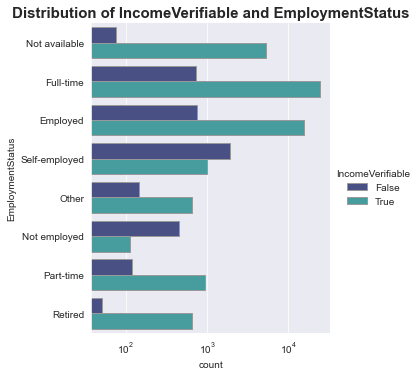

In [85]:
a=sb.catplot(data=df, hue='IncomeVerifiable', y='EmploymentStatus', kind='count', orient='h',palette="mako", edgecolor=".6")
a.set(xscale='log');
plt.title("Distribution of IncomeVerifiable and EmploymentStatus", weight = 'bold', fontsize = 15)

Observation 2:<br>
who work in full time and Employed most of them hava documentation to support their 

<h3>CreditScoreAverage and LoanStatus

Text(0.5, 1, 'LoanStatus and CreditScoreAverage')

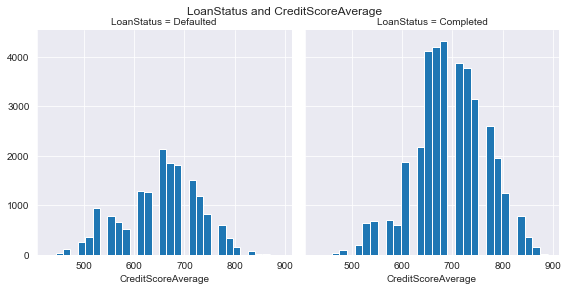

In [86]:
filtered_data = df[df['CreditScoreAverage'] >= 400]
grid = sb.FacetGrid(data=filtered_data, col='LoanStatus', height=4)
grid.map(plt.hist, 'CreditScoreAverage', bins=30)
plt.suptitle('LoanStatus and CreditScoreAverage',x=0.5,y=1,ha='center' )

Observation 3:<br>
Based on this plot, more people with average credit scores between 600 and 800 completed their loans than defaulted on them.

<h3> CurrentlyInGroup and LoanStatus

Text(0.5, 1, 'LoanStatus and CurrentlyInGroup ')

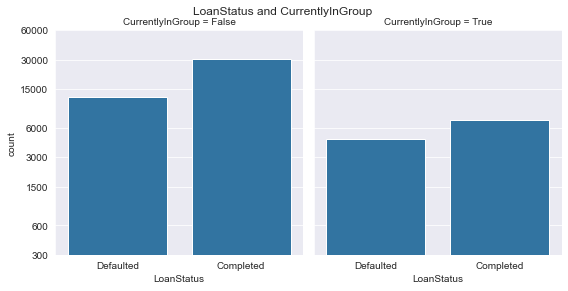

In [87]:
order = df.LoanStatus.unique()
p = sb.FacetGrid(data=df, col='CurrentlyInGroup', height=4)
p.map(sb.countplot, 'LoanStatus', order=order)
p.set(yscale='log')
y=[300, 600, 1500, 3000, 6000, 15000, 30000, 60000]
p.set(yticks=y, yticklabels=y);
plt.suptitle('LoanStatus and CurrentlyInGroup ',x=0.5,y=1,ha='center' )

Observation 4:<br>
who is not in group comleted thire lone more then the People in group 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> the most interesting relationships was with loan state such as who is Currently In Group  Through the graph, it became clear that those who are not in a group complete their loan.also Credit Score Average , and Loan Original Amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> who is Employed have  the required documentation to support their income more then other 


## Multivariate Exploration

<h3>ProsperRating (Alpha),LoanStatus and LoanOriginalAmount

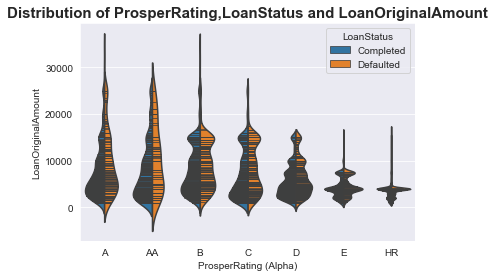

In [88]:
df = df.sort_values(by='ProsperRating (Alpha)')
sb.violinplot(data=df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus',split=True,inner='stick')
plt.title("Distribution of ProsperRating,LoanStatus and LoanOriginalAmount", weight = 'bold', fontsize = 15);


Observation 1:<br>
It is mostly low-rated individuals who default on their Prosper loans.

<h3>EmploymentStatus,LoanStatus and CreditScoreAverage

Text(0.5, 1.0, 'Distribution of EmploymentStatus,LoanStatus and CreditScoreAverage')

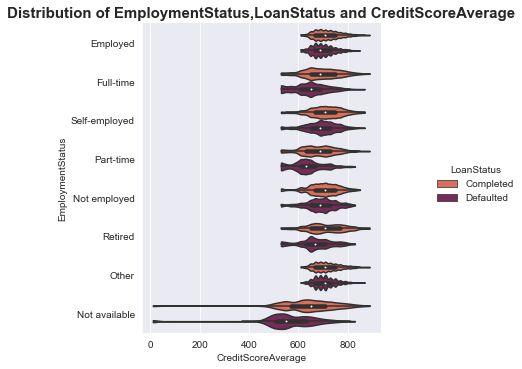

In [89]:

sb.catplot(
    data=df, x="CreditScoreAverage", y="EmploymentStatus", hue="LoanStatus",
    kind="violin", bw=.15, cut=0,split=False,palette="rocket_r",
)
plt.title("Distribution of EmploymentStatus,LoanStatus and CreditScoreAverage", weight = 'bold', fontsize = 15)

observation 4:<br>
According to this graph, full-time employees tend to complete three terms. Also, those with a Not available employment status are at highest risk of defaulting, as are most of those with credit scores below 650.

<h3>EmploymentStatus,LoanStatus and InvestmentFromFriendsCount

Text(0.5, 1.0, 'Distribution of employmentStatus,LoanStatus and InvestmentFromFriendsCount')

<Figure size 2880x1440 with 0 Axes>

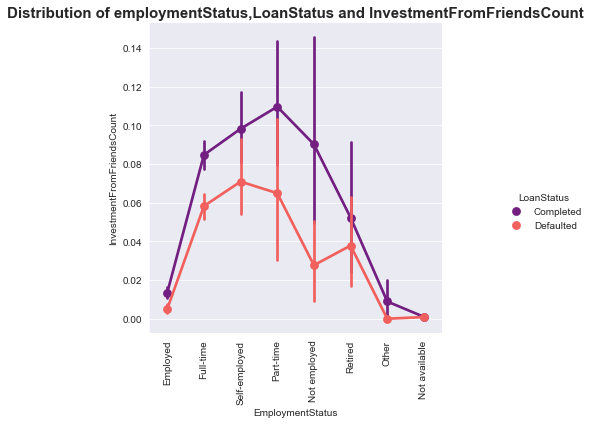

In [90]:
plt.figure(figsize = [40, 20])
sb.catplot(data=df, x="EmploymentStatus", y="InvestmentFromFriendsCount", hue="LoanStatus", kind="point",palette="magma")
plt.xticks(rotation=90);
plt.title("Distribution of employmentStatus,LoanStatus and InvestmentFromFriendsCount", weight = 'bold', fontsize = 15)


observation 3:<br>
The average investment from friends count is higher among full-time employees than among other categories.

<h3>Recommendations , LoanStatus and EmploymentStatus

Text(31.61835937500001, 0.5, 'InvestmentFromFriendsCount')

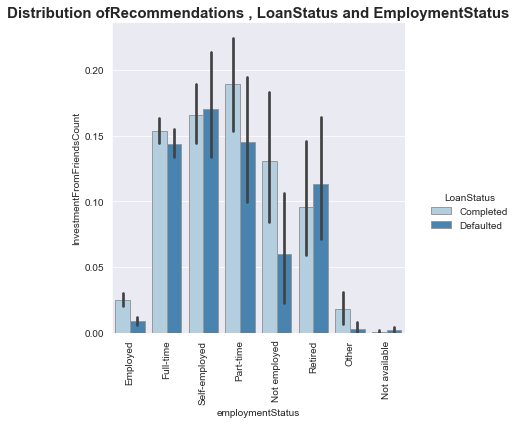

In [91]:
sb.catplot(data=df,y="Recommendations", hue='LoanStatus', x='EmploymentStatus',palette="Blues", edgecolor=".6",kind="bar")
plt.xticks(rotation=90);
plt.title("Distribution ofRecommendations , LoanStatus and EmploymentStatus", weight = 'bold', fontsize = 15)
plt.xlabel('employmentStatus')
plt.ylabel('InvestmentFromFriendsCount')


observation 4:<br>
the fulltime Employment Statu are have the most recommendations and also completed thir loan then other categories

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I tested whether the relationship between employment status and loan status could be further explained by considering the interactions between other variables.


### Were there any interesting or surprising interactions between features?

> that people with high Prosper ratings tend to have higher defaulted credit amounts than those with lower default rates

## Conclusions
>Working with this data was challenging and hard that the data was indirect feature with the main variable .
in exploration Phase , the defaulted credits tend to be are generally smaller than completed credits ones.
the Employed more likely the complete thire loan ,also they have more Recommedations .Furthermore ,who is not in  group will likely complete thire loan . the the majority of who have a loan thire Income Rangr is $25,000-49,999 and thire not are not home owner
